In [1]:
import matplotlib
matplotlib.rcParams['font.family']='Source Han Serif CN'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
from absbox import API

localAPI = API("http://localhost:8081",'chinese')

mypool = {"清单":[["租赁",{"初始租金":100,"初始期限":12,"频率":"月末","起始日":"2021-01-31","计提周期":"季度末", "涨幅":0.085}]
                #,["租赁",{"初始租金":100,"初始期限":12,"频率":"月末","起始日":"2021-02-01","计提周期":"季度末", "涨幅":[0.05,0.06,0.0]}]
                #,["租赁",{"固定租金":100,"初始期限":12,"频率":["每月",20],"起始日":"2021-02-01"}]
                ]
         ,"封包日":"2021-01-04"}

#from absbox.local.util import aggCFby
#remoteAPI = API("https://absbox.org/api/latest",'chinese')

<AxesSubplot:xlabel='日期', ylabel='租金合计'>

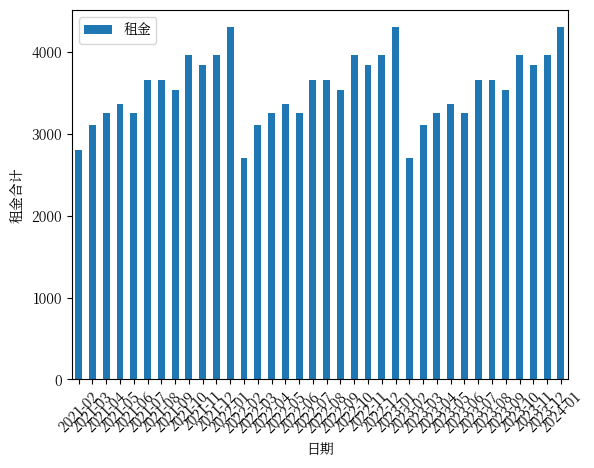

In [7]:
from absbox.local.util import aggCFby
p = localAPI.runPool(mypool
                    ,assumptions=[{"租赁截止日":"2023-02-01"}]
                    ,read=True)
# 对租金按月份进行归集     
aggCFby(p,"M",["租金"]).plot.bar(rot=45,ylabel="租金合计")

<AxesSubplot:xlabel='日期', ylabel='租金合计'>

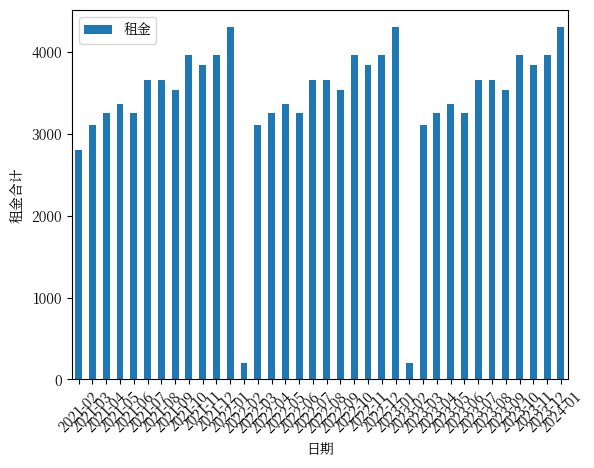

In [8]:
p = localAPI.runPool(mypool
                     ,assumptions=[{"租赁截止日":"2023-02-01"}
                                   ,{"租赁间隔":25}]
                     ,read=True)
aggCFby(p,"M",["租金"]).plot.bar(rot=45,ylabel="租金合计")

<AxesSubplot:xlabel='日期', ylabel='租金合计'>

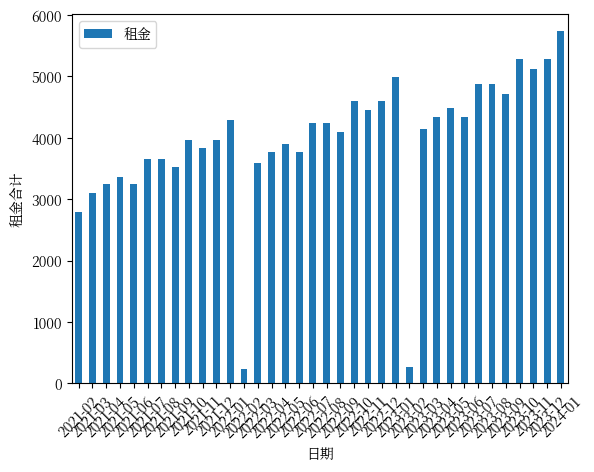

In [9]:
p = localAPI.runPool(mypool,assumptions=[{"租赁截止日":"2023-02-01"}
                                        ,{"租赁间隔":25}
                                        ,{"租赁年涨幅":0.15}],read=True)
aggCFby(p,"M",["租金"]).plot.bar(rot=45,ylabel="租金合计")

<AxesSubplot:xlabel='日期', ylabel='租金合计'>

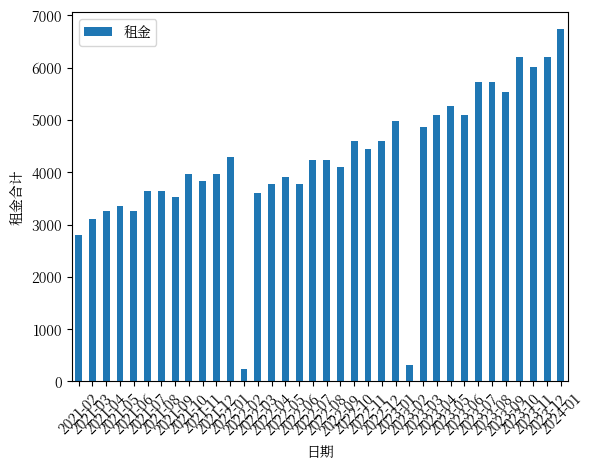

In [10]:
increase_curve_assump = [{"租赁年涨幅":[["2021-01-01",0.05]
                          ,["2022-01-01",0.15]
                          ,["2023-01-01",0.35]]}
                         ,{"租赁截止日":"2023-02-01"}
                         ,{"租赁间隔":25}]
p = localAPI.runPool(mypool
                     ,assumptions=increase_curve_assump
                     ,read=True)
aggCFby(p,"M",["租金"]).plot.bar(rot=45,ylabel="租金合计")

In [11]:
from absbox.local.util import npv
npv(p,rate=0.07,init=("2021-01-04",0))

134707.17588300863

In [25]:
deal_data = ["租金类ABS案例"
    ,{"封包日":"2021-03-31","起息日":"2021-06-15","首次兑付日":"2021-07-26"
      ,"法定到期日":"2060-12-01","收款频率":"月末","付款频率":["每月",26]}
    ,mypool
    ,(("账户01",{"余额":0}),)
    ,(("A1",{"当前余额":80_000
             ,"当前利率":0.07
             ,"初始余额":80_000
             ,"初始利率":0.07
             ,"起息日":"2021-06-15"
             ,"利率":{"固定":0.08}
             ,"债券类型":{"锁定摊还":"2022-10-26"}
            })
      ,("B",{"当前余额":30_000
             ,"当前利率":0.00
             ,"初始余额":30_000
             ,"初始利率":0.00
             ,"起息日":"2021-06-15"
             ,"利率":{"期间收益":0.02}
             ,"债券类型":{"权益":None}
             }))
    ,(("日常费用",{"类型":{"周期费用":[["每月",1],500]}}),)
    ,{"未违约":[
         ["支付费用",["账户01"],['日常费用']]
         ,["支付利息","账户01",["A1"]]
         ,["支付期间收益","账户01",["B"]]
         ,["支付本金","账户01",["A1"]]
         ,[[('债券余额','A1') ,"=",0]
          ,["支付本金","账户01",["B"]]
          ,["支付收益","账户01","B"]
          ]
     ]}
    ,(["租金回款","账户01"],)
    ,None
    ,None
    ,None]

In [26]:
from absbox.local.china import SPV
from absbox.local.util import bondView
r = localAPI.run(SPV(*deal_data),assumptions=increase_curve_assump,read=True)

# 获取 A1 B 的现金流.
r['bonds']['A1']
r['bonds']['B']

# 将两个债券现金流一并展示 
bondView(r).drop([("A1","备注"),("B","备注")],axis=1)

A1                                           B           \
                  余额      利息        本金  执行利率      本息合计        余额       利息   
日期                                                                          
2021-07-26  80000.00  629.04      0.00  0.07    629.04  30000.00    66.80   
2021-08-26  80000.00  475.61      0.00  0.07    475.61  30000.00    50.73   
2021-09-26  80000.00  475.61      0.00  0.07    475.61  30000.00    50.90   
2021-10-26  80000.00  460.27      0.00  0.07    460.27  30000.00    49.42   
2021-11-26  80000.00  475.61      0.00  0.07    475.61  30000.00    51.23   
2021-12-26  80000.00  460.27      0.00  0.07    460.27  30000.00    49.76   
2022-01-26  80000.00  475.61      0.00  0.07    475.61  30000.00    51.55   
2022-02-26  80000.00  475.61      0.00  0.07    475.61  30000.00    51.75   
2022-03-26  80000.00  429.58      0.00  0.07    429.58  30000.00    46.90   
2022-04-26  80000.00  475.61      0.00  0.07    475.61  30000.00    52.06   
2022-05-26  80000.00  460.27      0.00  0.07    460.27  30000.00    50.56   
2022-06-26  80000.00  475.61      0.00  0.07    475.61  30000.00    52.40   
2022-07-26  80000.00  460.27      0.00  0.07    460.27  30000.00    50.87   
2022-08-26  80000.00  475.61      0.00  0.07    475.61  30000.00    52.77   
2022-09-26  80000.00  475.61      0.00  0.07    475.61  30000.00    52.93   
2022-10-26  31366.92  460.27  48633.08  0.07  49093.35  30000.00    51.37   
2022-11-26  27511.88  186.48   3855.04  0.07   4041.52  30000.00    53.30   
2022-12-26  23775.26  158.28   3736.62  0.07   3894.90  30000.00    51.70   
2023-01-26  19875.39  141.34   3899.87  0.07   4041.21  30000.00    53.61   
2023-02-26  15561.91  118.16   4313.48  0.07   4431.64  30000.00    53.78   
2023-03-26  15561.91    0.00      0.00  0.07      0.00  30000.00     0.00   
2023-04-26  11670.98  176.07   3890.93  0.07   4067.00  30000.00   102.78   
2023-05-26   7191.57   67.14   4479.41  0.07   4546.55  30000.00    52.55   
2023-06-26   2519.67   42.75   4671.90  0.07   4714.65  30000.00    54.42   
2023-07-26      0.00   14.49   2519.67  0.07   2534.16  27987.98    52.92   
2023-08-26      0.00     NaN       NaN   NaN       NaN  22829.16    58.20   
2023-09-26      0.00     NaN       NaN   NaN       NaN  17679.18    67.04   
2023-10-26      0.00     NaN       NaN   NaN       NaN  12720.01    73.43   
2023-11-26      0.00     NaN       NaN   NaN       NaN   7101.30    84.39   
2023-12-26      0.00     NaN       NaN   NaN       NaN   1689.28    90.98   
2024-01-26      0.00     NaN       NaN   NaN       NaN      0.00  4013.82   
2024-02-26      0.00     NaN       NaN   NaN       NaN      0.00  6230.10   

                                   
                 本金 执行利率     本息合计  
日期                                 
2021-07-26     0.00    0    66.80  
2021-08-26     0.00    0    50.73  
2021-09-26     0.00    0    50.90  
2021-10-26     0.00    0    49.42  
2021-11-26     0.00    0    51.23  
2021-12-26     0.00    0    49.76  
2022-01-26     0.00    0    51.55  
2022-02-26     0.00    0    51.75  
2022-03-26     0.00    0    46.90  
2022-04-26     0.00    0    52.06  
2022-05-26     0.00    0    50.56  
2022-06-26     0.00    0    52.40  
2022-07-26     0.00    0    50.87  
2022-08-26     0.00    0    52.77  
2022-09-26     0.00    0    52.93  
2022-10-26     0.00    0    51.37  
2022-11-26     0.00    0    53.30  
2022-12-26     0.00    0    51.70  
2023-01-26     0.00    0    53.61  
2023-02-26     0.00    0    53.78  
2023-03-26     0.00    0     0.00  
2023-04-26     0.00    0   102.78  
2023-05-26     0.00    0    52.55  
2023-06-26     0.00    0    54.42  
2023-07-26  2012.02    0  2064.94  
2023-08-26  5158.82    0  5217.02  
2023-09-26  5149.98    0  5217.02  
2023-10-26  4959.17    0  5032.60  
2023-11-26  5618.71    0  5703.10  
2023-12-26  5412.02    0  5503.00  
2024-01-26  1689.28    0  5703.10  
2024-02-26     0.00    0  6230.10

In [30]:
from absbox.local.util import irr
irr(r['bonds']['B'],init=('2021-06-15',-30_000.00))
# 返回值: 1.152 -> 在2021年6月投入 10000元下, B的年化回报率 ->  15 % 
irr(r['bonds']['A1'],init=('2021-06-15',-80_000.00))
# 返回值: 1.152 -> 在2021年6月投入 60000.00元下, A1的年化回报率 -> 7.2 %

0.07227850664617311

In [37]:
# 多融资方案比较 
## 总融资规模 
total_issuance = 110_000

## 债务融资方案  
financing_plans = [(80_000,0.075,"2022-10-26"),(50_000,0.05,"2022-12-26")] 

## 资本结构方案 
liability_plans = [ (('A1',  {'当前余额': b, '当前利率': r,   '初始余额': b,   '初始利率': r,   '起息日': '2021-06-15',
   '利率': {'固定': 0.08}, '债券类型': {'锁定摊还': t}}),
  ('B',  {'当前余额': total_issuance - b,   '当前利率': 0.0,   '初始余额': total_issuance - b,   '初始利率': 0.0,   '起息日': '2021-06-15',
   '利率': {'期间收益': 0.02}, '债券类型': {'权益': None}}))
    for b,r,t in financing_plans ]


In [40]:
from absbox.local.util import update_deal


## 产品方案 
SPVs = [ SPV(*update_deal(deal_data,4,p)) for p in liability_plans ]

## 相同资产池表现下的结果 
rs = [ localAPI.run(s,assumptions=increase_curve_assump,read=True) for s in SPVs ]

### 方案一 现金流结果 
rs[0]['bonds']["A1"]
rs[0]['bonds']["B"]

### 方案二 现金流结果 
rs[1]['bonds']["A1"]
rs[1]['bonds']["B"]

## 确定权益投资金额 
equity_balance = [ -p[1][1]['当前余额'] for p in liability_plans]

# 计算权益投资回报 
[ irr(r['bonds']['B'],init=('2021-06-15',i)) for r,i in zip(rs,equity_balance) ]

[0.14238600656460276, 0.1240751752183367]